- Yahoo Finance 에서 주가 데이터 다운로드 (https://finance.yahoo.com/)
- 검색 후 Historical Data 선택
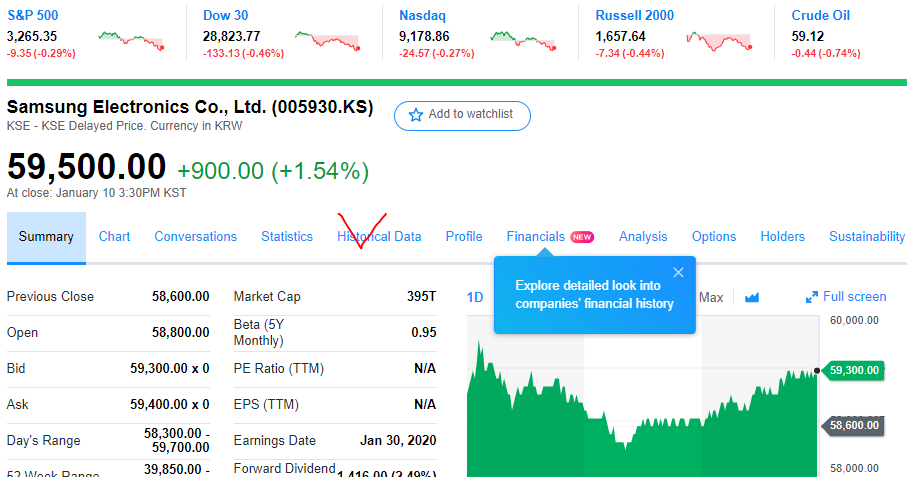

- 기간 선택 후 Download Data 클릭
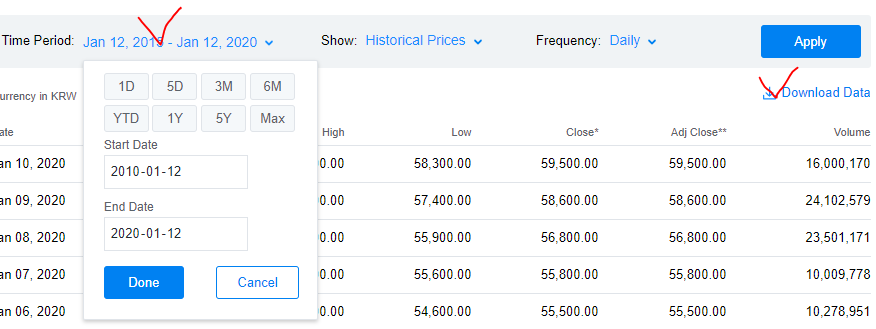

## G: Adj Close
주식의 분할, 배당, 배분 등을 고려해 조정한 종가

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading 및 확인

In [2]:
df = pd.read_csv('005930.KS.csv')
df.shape

(1227, 7)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-13,26280.0,26800.0,26000.0,26780.0,259.703888,12293400.0
1,2015-01-14,26780.0,27100.0,26700.0,26900.0,260.867584,14332250.0
2,2015-01-15,26900.0,26980.0,26580.0,26680.0,258.734100,14103900.0
3,2015-01-16,26680.0,26680.0,26260.0,26320.0,255.242996,13568500.0
4,2015-01-19,26580.0,26980.0,26400.0,26860.0,260.479706,6672950.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 7 columns):
Date         1227 non-null object
Open         1216 non-null float64
High         1216 non-null float64
Low          1216 non-null float64
Close        1216 non-null float64
Adj Close    1216 non-null float64
Volume       1216 non-null float64
dtypes: float64(6), object(1)
memory usage: 67.2+ KB


In [5]:
df.isnull().sum()

Date          0
Open         11
High         11
Low          11
Close        11
Adj Close    11
Volume       11
dtype: int64

In [8]:
df.loc[df.Open.isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
700,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN
705,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN
729,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
942,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN
1118,2019-08-02,NaN,NaN,NaN,NaN,NaN,NaN
1139,2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN
1144,2019-09-10,NaN,NaN,NaN,NaN,NaN,NaN
1159,2019-10-04,NaN,NaN,NaN,NaN,NaN,NaN
1184,2019-11-11,NaN,NaN,NaN,NaN,NaN,NaN
1187,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN


# 전처리
- date를 index로 변경, 날짜타입(datetime)으로 변환
- 결측치 제거
- Adj Close 컬럼 제거
- MinMaxScaling
- close는 우리가 예측할 값

In [9]:
# Date를 문자열에서 datetime 으로 변환
df['Date'] = pd.to_datetime(df.Date)

In [10]:
# Date를 index로 변환
df.set_index('Date', inplace=True)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-13,26280.0,26800.0,26000.0,26780.0,259.703888,12293400.0
2015-01-14,26780.0,27100.0,26700.0,26900.0,260.867584,14332250.0
2015-01-15,26900.0,26980.0,26580.0,26680.0,258.734100,14103900.0
2015-01-16,26680.0,26680.0,26260.0,26320.0,255.242996,13568500.0
2015-01-19,26580.0,26980.0,26400.0,26860.0,260.479706,6672950.0


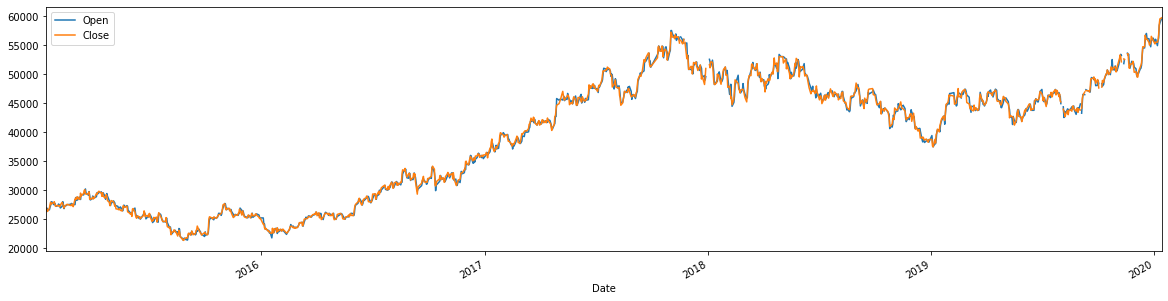

In [16]:
df[['Open', 'Close']].plot(figsize=(20,5));

In [17]:
# 결측치 제거
df.dropna(inplace=True)

In [18]:
# Adg Close컬럼 삭제
df.drop(columns=['Adj Close'], inplace=True)

In [19]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-13,26280.0,26800.0,26000.0,26780.0,12293400.0
2015-01-14,26780.0,27100.0,26700.0,26900.0,14332250.0
2015-01-15,26900.0,26980.0,26580.0,26680.0,14103900.0
2015-01-16,26680.0,26680.0,26260.0,26320.0,13568500.0
2015-01-19,26580.0,26980.0,26400.0,26860.0,6672950.0


### X, y 분리
 - X: 전체컬럼, y: Close 컬럼

In [20]:
# X, y 분리
# y : 종가(Close)
df_y = df['Close'].to_frame() # series.to_frame(): 시리즈를 데이터프레임으로 만든다. (머신러닝은 대부분 2차원으로 받으므로)
# df_X = df.drop(columns=['Close'])
df_X = df   #Close를 제거하지 않는다. (어제까지 데이터로 오늘 데이터 맞추는 것 => 어제까지 데이터에도 Close 데이터가 있으므로.)

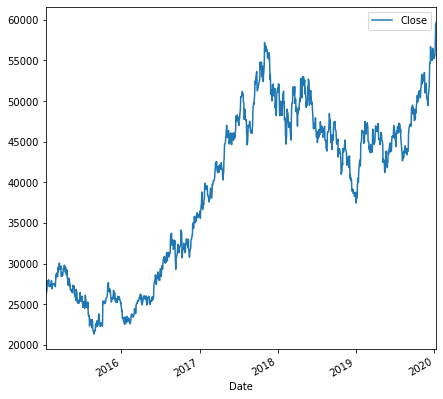

In [21]:
# 종가 선그래프로 보기
df_y.plot(figsize=(7,7));

### Scaling - MinMaxScaler
- Scaler를 X, y 용 따로 만든다.
    - y를 inverse 하기 위해

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(df_X)
y = scaler_Y.fit_transform(df_y)

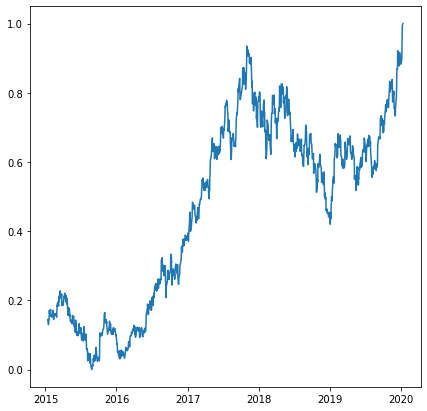

In [23]:
# Scaling된 것 확인
# 종가 선그래프로 보기 - 
# G: 반환값이 ndarray이므로 y.plot()안됨. X는 날짜가 아니다.
plt.figure(figsize=(7,7))
plt.plot(df.index, y);

##  날짜 종가 예측
- X: 50일치 주가, y: 51일째 주가. 
    - 50일의 연속된 주식가격으로 51일째 주가를 예측한다.
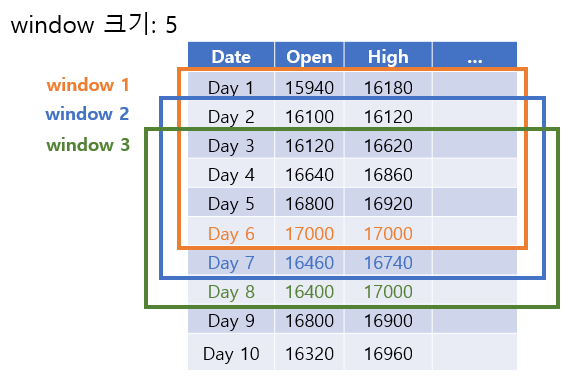     

X, y를 만든다.
각 index에 window size의 데이터셋이 들어가도록 한다.

In [24]:
X.shape

(1216, 5)

In [25]:
y.shape

(1216, 1)

In [26]:
# X의 window size
SEQ_LEN = 50
data_X = []
data_y = []
for i in range(0, len(y) - SEQ_LEN): #SEQ_LEN 이후는 개수를 못맞추므로 
    _x = X[i: i+SEQ_LEN]
    _y = y[i+SEQ_LEN]
    data_X.append(_x)
    data_y.append(_y)

```python
#한번돌때 결과. x는 [[]] 에게 추가. append시 그러므로 3차원
[[0.05008865 0.04895105 0.05483727 0.29711911]
 [0.05363475 0.04763986 0.05572893 0.20678774]
 [0.05407801 0.05856643 0.05706643 0.41049809]]

#y는 [] 이게 추가. 그러므로 append시 2차원
[0.07058824]
```

In [27]:
# np.shape(리스트) 하면 리스트 shape을 알 수 있다. (ndarray로 변환안해도됨.)
np.shape(data_X), np.shape(data_y)

((1166, 50, 5), (1166, 1))

## Train, Test 분리

In [28]:
# sklearn은 안된다 shuffling없이 나눠야 하므로

In [29]:
train_size = int(len(data_y) * 0.8)
test_size = len(data_y) - train_size #출력해보려고
print(train_size, test_size)

932 234


In [30]:
X_train, X_test = np.array(data_X[0:train_size]), np.array(data_X[train_size:])
y_train, y_test = np.array(data_y[0:train_size]), np.array(data_y[train_size:])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((932, 50, 5), (932, 1), (234, 50, 5), (234, 1))

## Model 생성

In [31]:
from tensorflow.keras import models, layers

- LSTM 레이어는 return_sequences 인자에 따라 마지막 시퀀스에서 한 번만 출력할 수 있고 각 시퀀스에서 출력을 할 수 있다. 
    - return_sequences=True: 시퀀스마다 결과를 출력. False(기본값): 전체 Sequence를 처리하고 결과를 하나만 출력
- many to many 문제를 풀거나 LSTM 레이어를 여러개로 쌓아올릴 때는 return_sequence=True 옵션을 사용합니다. 
- Dese에는 False로 해서 하나만 전달.
- 아래 그림에서 왼쪽은 return_sequences=False일 때, 오른쪽은 return_sequence=True일 때의 형상입니다.

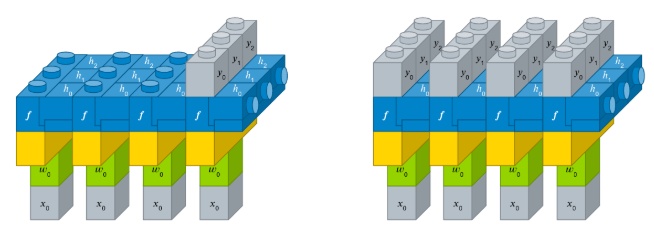

[출처: https://tykimos.github.io/2017/04/09/RNN_Getting_Started]

In [32]:
df_X.shape

(1216, 5)

In [33]:
model = models.Sequential()
# input : 1개가 4개 컬럼. 50개의 연속된 값.
# 다음 Layer가 LSTM이면 return_sequences=True, Dense면 False를 준다.

# lstm 추가하면 return_sequences=True로 변경
model.add(layers.LSTM(32, input_shape = (SEQ_LEN, 5), return_sequences = False, activation="relu"))            
# model.add(layers.LSTM(32, return_sequences=False))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1)) # 회귀의 경우 activation을 생략 또는 linear로 지정. linear는 처리결과를 그냥 내보낸다.
model.compile(loss='mse', optimizer='adam') #metrics는 loss와 같이 mse 쓸 것이므로 지정 안함. 

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4864      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


## 모델 학습, 평가

In [35]:
model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

Train on 745 samples, validate on 187 samples
Epoch 1/30
745/745 [==============================] - 3s 4ms/sample - loss: 0.0795 - val_loss: 0.0799
Epoch 2/30
745/745 [==============================] - 0s 501us/sample - loss: 0.0233 - val_loss: 0.0072
Epoch 3/30
745/745 [==============================] - 0s 452us/sample - loss: 0.0057 - val_loss: 0.0081
Epoch 4/30
745/745 [==============================] - 0s 440us/sample - loss: 0.0068 - val_loss: 0.0021
Epoch 5/30
745/745 [==============================] - 0s 529us/sample - loss: 0.0017 - val_loss: 0.0021
Epoch 6/30
745/745 [==============================] - 0s 461us/sample - loss: 0.0017 - val_loss: 0.0021
Epoch 7/30
745/745 [==============================] - 0s 446us/sample - loss: 0.0011 - val_loss: 9.4191e-04
Epoch 8/30
745/745 [==============================] - 0s 446us/sample - loss: 8.5470e-04 - val_loss: 0.0015
Epoch 9/30
745/745 [==============================] - 0s 443us/sample - loss: 8.3806e-04 - val_loss: 9.0275e-04
Epoc

In [36]:
test_loss = model.evaluate(X_test, y_test)

234/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [37]:
test_loss

0.0006429734132372034

In [38]:
# loss를 실제 price로 변경(min max한 것 원복.) mse이므로 root 씌운다.
np.sqrt(scaler_Y.inverse_transform(np.array(test_loss).reshape(-1,1))) #2D로 넣어야 해서

array([[146.1665641]])

In [40]:
# 모델 저장
model.save('models/samsung_stock_predict.h5')

OSError: Unable to create file (unable to open file: name = 'models/samsung_stock_predict.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [ ]:
model2 = models.load_model('models/samsung_stock_predict.h5')

## 예측

In [ ]:
test_pred = model2.predict(X_test)

In [ ]:
test_pred[:3] #scaling된 것이 나오므로 다시 복원시킨다.

In [ ]:
predict_price = scaler_Y.inverse_transform(test_pred)

In [98]:
predict_price[:3]

array([[52679.2  ],
       [52157.938],
       [51668.086]], dtype=float32)

In [99]:
y_test_price = scaler_Y.inverse_transform(y_test)

In [100]:
y_test_price[0,0] - predict_price[0,0]

-4479.19921875

## 그래프로 비교

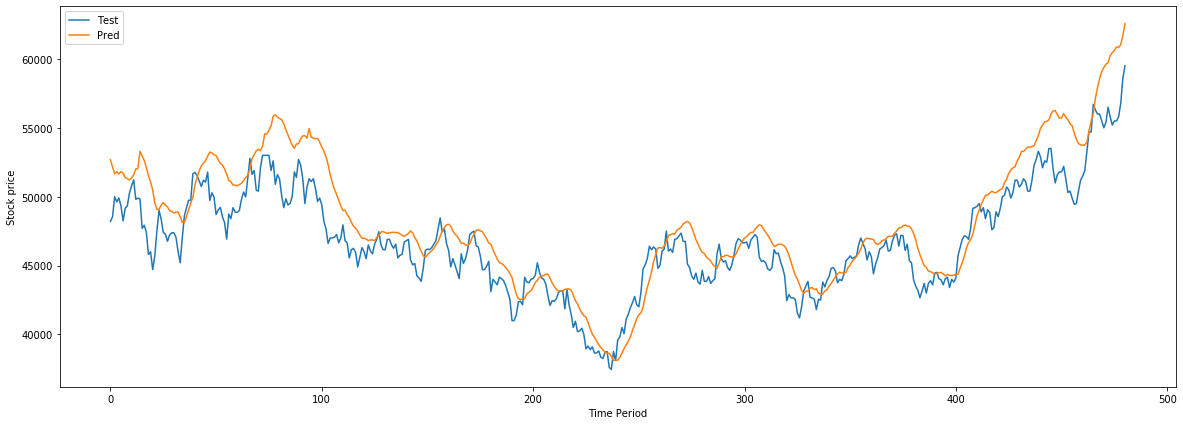

In [101]:
plt.figure(figsize=(20,7))
plt.plot(y_test_price, label='Test')
plt.plot(predict_price, label='Pred')
plt.legend()
plt.xlabel('Time Period')
plt.ylabel('Stock price')
plt.show()

In [ ]:
|